In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

import tensorflow_hub as hub
print("TensorFlow Hub version:", hub.__version__)

TensorFlow version: 2.17.0
TensorFlow Hub version: 0.16.1


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.stats import shapiro
import statsmodels.api as sm
import statsmodels.formula.api as smf
from datetime import datetime,date,timedelta
import datetime as dt
import time
from wordcloud import WordCloud # Visualisation
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import wordpunct_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import words
from nltk.corpus import abc
from sklearn.metrics import coverage_error
from sklearn.metrics import label_ranking_average_precision_score
from sklearn.metrics import label_ranking_loss
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
import torch
import transformers as ppb
import warnings
warnings.filterwarnings('ignore')
from transformers import AutoTokenizer, DistilBertModel
import torch
import os
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA

import gensim
import gensim.downloader as api
from gensim.models import Word2Vec

import mlflow
from mlflow.models import infer_signature

In [ ]:
df_net=pd.read_csv('df_net.csv', sep=',')
df_net

,LastActivityDate,Title,Tags,Score,sentence_bow,sentence_bow_lem,sentence_dl
0,2022-08-29 20:14:36,Determine the type of an object?,<python><dictionary><types><typeof>,2164,determine type object,determine type object,determine the type of an object ?
1,2022-07-02 05:29:08,Why can't Python parse this JSON data?,<python><json><parsing>,1503,why python parse json data,why python parse json data,why can t python parse this json data ?
2,2023-11-20 22:23:13,Best way to convert string to bytes in Python 3?,<python><string><character-encoding><python-3.x>,1482,best way convert string bytes python,best way convert string byte python,best way to convert string to bytes in python 3 ?
3,2022-11-09 15:44:56,Display number with leading zeros,<python><integer><string-formatting>,1419,display number leading zeros,display number leading zero,display number with leading zeros
4,2023-07-28 17:04:02,Create a Pandas Dataframe by appending one row...,<python><pandas><dataframe><append>,1399,create pandas dataframe appending one row time,create panda dataframe appending one row time,create a pandas dataframe by appending one row...
5,2022-11-23 08:30:50,Should I use 'has_key()' or 'in' on Python dicts?,<python><dictionary>,1122,should use key python dicts,should use key python dicts,should i use has key ( ) or in on python dicts ?
6,2022-08-15 07:57:04,How to check if type of a variable is string?,<python><string><variables><types>,1051,how check type variable string,how check type variable string,how to check if type of a variable is string ?
7,2023-01-27 10:02:02,Which exception should I raise on bad/illegal ...,<python><exception><arguments>,820,which exception raise bad illegal argument com...,which exception raise bad illegal argument com...,which exception should i raise on bad illegal ...
8,2022-05-31 17:20:40,Using @property versus getters and setters,<python><properties><getter-setter>,798,using property versus getters setters,using property versus getters setter,using property versus getters and setters
9,2023-01-29 17:03:17,"How can I check if a string represents an int,...",<python><string><integer>,733,how check string represents int without using ...,how check string represents int without using ...,how can i check if a string represents an int ...


In [66]:
## Word2Vec
model = api.load("word2vec-google-news-300")

In [67]:
tokens = tf_feature_names
tokens      

NameError: name 'tf_feature_names' is not defined

In [ ]:
nltk.download('abc')

NameError: name 'nltk' is not defined

In [ ]:
tokens_list = tokens.tolist()
tokens_list

In [ ]:
tokens_list[-1]

In [69]:
tags = [tag[1:len(tag) - 1].split('><') for tag in df_net['Tags']]
tags

[['python', 'dictionary', 'types', 'typeof'],
 ['python', 'json', 'parsing'],
 ['python', 'string', 'character-encoding', 'python-3.x'],
 ['python', 'integer', 'string-formatting'],
 ['python', 'pandas', 'dataframe', 'append'],
 ['python', 'dictionary'],
 ['python', 'string', 'variables', 'types'],
 ['python', 'exception', 'arguments'],
 ['python', 'properties', 'getter-setter'],
 ['python', 'string', 'integer'],
 ['python', 'dictionary', 'pickle'],
 ['python', 'list', 'python-3.x', 'map-function'],
 ['python', 'pandas', 'group-by', 'pivot', 'pivot-table'],
 ['python', 'variables', 'defined'],
 ['python', 'json'],
 ['python', 'dictionary', 'list-comprehension'],
 ['python', 'lambda', 'conditional-operator'],
 ['python', 'string'],
 ['python', 'windows', 'environment-variables', 'pythonpath'],
 ['python', 'arrays', 'intersection'],
 ['python', 'stdout'],
 ['python', 'subprocess'],
 ['python', 'range'],
 ['python', 'json', 'dictionary', 'serialization'],
 ['python', 'path', 'working-dire

In [ ]:
tokens_list = df_net['sentence_dl'].tolist()
tokens_list

['determine the type of an object ?',
 'why can t python parse this json data ?',
 'best way to convert string to bytes in python 3 ?',
 'display number with leading zeros',
 'create a pandas dataframe by appending one row at a time',
 'should i use has key ( ) or in on python dicts ?',
 'how to check if type of a variable is string ?',
 'which exception should i raise on bad illegal argument combinations in python ?',
 'using property versus getters and setters',
 'how can i check if a string represents an int , without using try except ?',
 'how can i use pickle to save a dict ( or any other python object ) ?',
 'getting a map ( ) to return a list in python 3.x',
 'how can i pivot a dataframe ?',
 'determine if variable is defined in python',
 'reading json from a file',
 'python dictionary comprehension',
 "is there a way to perform `` if '' in python s lambda ?",
 'convert a list of characters into a string',
 'how to add to the pythonpath in windows , so it finds my modules packag

In [ ]:
warnings.filterwarnings('ignore')

#word2vec = gensim.models.Word2Vec(abc.sents())
word2vec = gensim.models.Word2Vec([tokens_list], vector_size=100, window=5, min_count=1, workers=4)

# Ensure the last token is in the model's vocabulary
if tokens_list[-1] in word2vec.wv:
    embedding1 = word2vec.wv.most_similar(tokens_list[-1]) # 'zero'

    # Select additional words to form a meaningful dataset for PCA
    words = list(word2vec.wv.index_to_key)[:50]  # First 50 words from the vocab

    # Retrieve the vectors for these words
    X = [word2vec.wv[word] for word in words]

    # Convert the list of vectors to a NumPy array
    X = np.array(X)

print(f'Word Embeddibng using Word2Vec: \n\nMost Similar Words => {embedding1} \n\nWord Vector => {X}')
print(X.shape)

Word Embeddibng using Word2Vec: 

Most Similar Words => [('using property versus getters and setters', 0.21881385147571564), ('python dictionary comprehension', 0.21618524193763733), ('how to reliably open a file in the same directory as the currently running script', 0.1954699158668518), ('str object has no attribute decode . python 3 error ?', 0.16944074630737305), ('compute list difference', 0.1517835110425949), ('how to count the frequency of the elements in an unordered list ?', 0.1417730301618576), ('confused by python file mode `` w ``', 0.10844813287258148), ('double iteration in list comprehension', 0.09935729950666428), ('python : access class property from string', 0.09630616754293442), ('getting a map ( ) to return a list in python 3.x', 0.09307274967432022)] 

Word Vector => [[-5.3801289e-04  2.3741293e-04  5.1009548e-03 ... -7.0436331e-03
   8.9869433e-04  6.3900729e-03]
 [-8.6227441e-03  3.6707378e-03  5.1883711e-03 ... -2.3945796e-03
  -9.5124273e-03  4.4996338e-03]
 [ 

In [ ]:
words

['importerror : no module named matplotlib.pyplot',
 'how can i pivot a dataframe ?',
 'why does range ( start , end ) not include end ?',
 'store output of subprocess.popen call in a string',
 'redirect stdout to a file in python ?',
 'how to find list intersection ?',
 'how to add to the pythonpath in windows , so it finds my modules packages ?',
 'convert a list of characters into a string',
 "is there a way to perform `` if '' in python s lambda ?",
 'python dictionary comprehension',
 'reading json from a file',
 'determine if variable is defined in python',
 'getting a map ( ) to return a list in python 3.x',
 'modulenotfounderror : what does it mean main is not a package ?',
 'how can i use pickle to save a dict ( or any other python object ) ?',
 'how can i check if a string represents an int , without using try except ?',
 'using property versus getters and setters',
 'which exception should i raise on bad illegal argument combinations in python ?',
 'how to check if type of a

### PCA


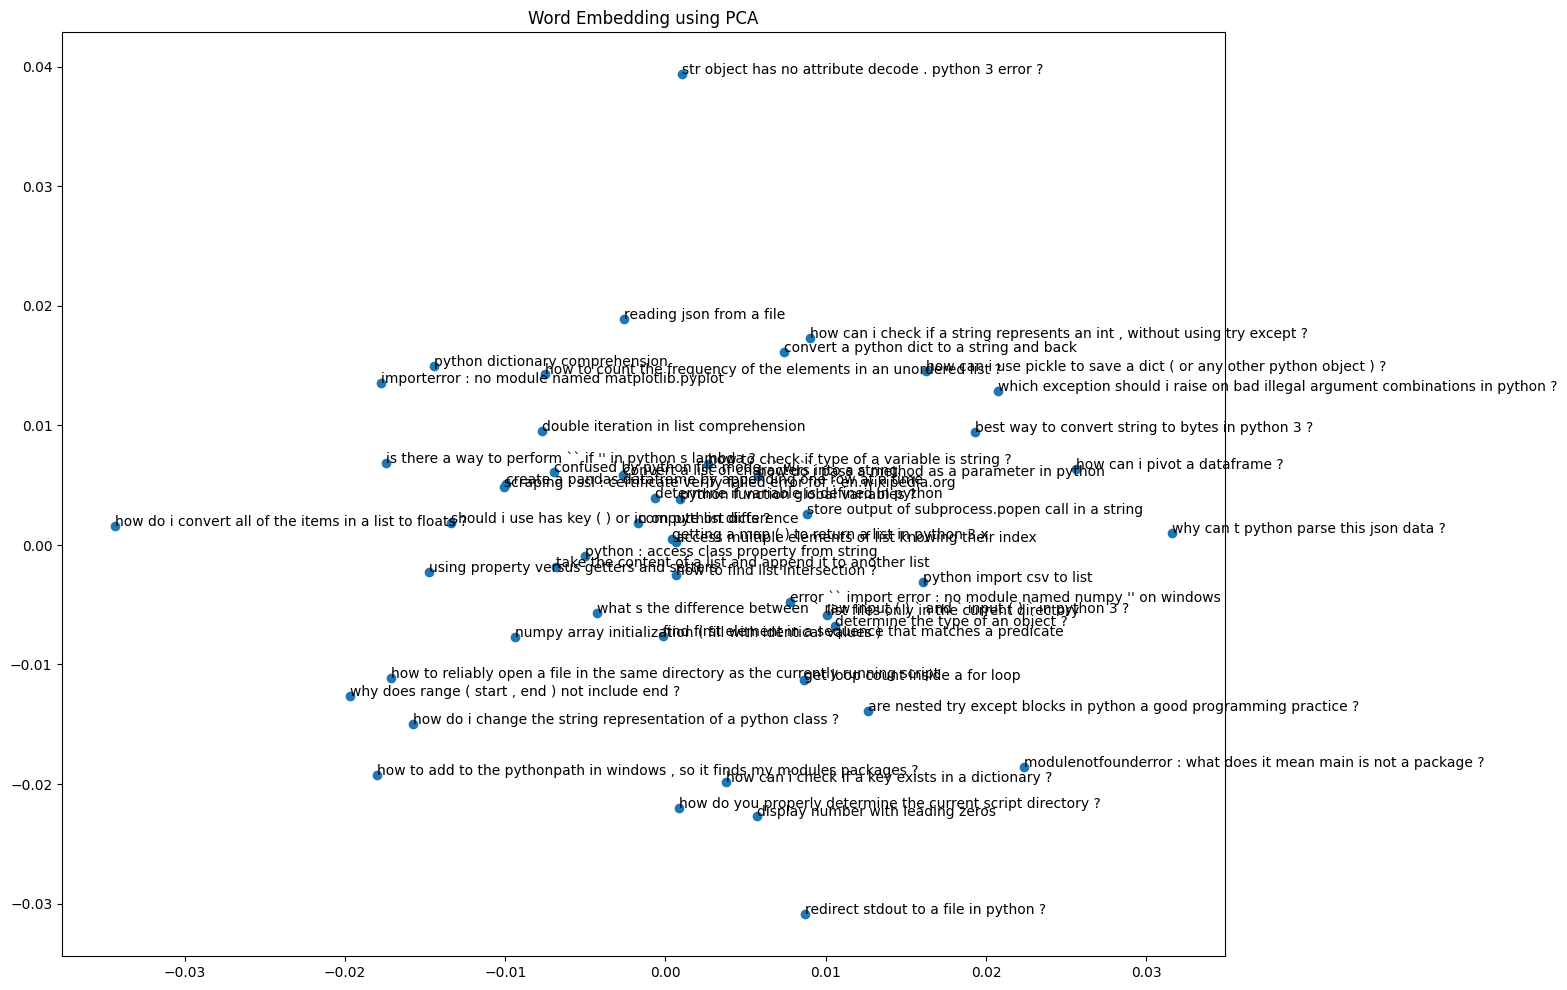

In [ ]:
pca = PCA(n_components = 2)
result = pca.fit_transform(X)

plt.figure(figsize = (15, 12))
plt.title('Word Embedding using PCA')
plt.scatter(result[ : , 0], result[ : , 1])
for i, word in enumerate(words):
    plt.annotate(word, xy = (result[i, 0], result[i, 1]))
plt.show()

In [ ]:
y = df_net.Tags
y

0                   <python><dictionary><types><typeof>
1                               <python><json><parsing>
2      <python><string><character-encoding><python-3.x>
3                  <python><integer><string-formatting>
4                   <python><pandas><dataframe><append>
5                                  <python><dictionary>
6                    <python><string><variables><types>
7                        <python><exception><arguments>
8                   <python><properties><getter-setter>
9                             <python><string><integer>
10                         <python><dictionary><pickle>
11             <python><list><python-3.x><map-function>
12       <python><pandas><group-by><pivot><pivot-table>
13                         <python><variables><defined>
14                                       <python><json>
15             <python><dictionary><list-comprehension>
16               <python><lambda><conditional-operator>
17                                     <python><

[['python', 'dictionary', 'types', 'typeof'],
 ['python', 'json', 'parsing'],
 ['python', 'string', 'character-encoding', 'python-3.x'],
 ['python', 'integer', 'string-formatting'],
 ['python', 'pandas', 'dataframe', 'append'],
 ['python', 'dictionary'],
 ['python', 'string', 'variables', 'types'],
 ['python', 'exception', 'arguments'],
 ['python', 'properties', 'getter-setter'],
 ['python', 'string', 'integer'],
 ['python', 'dictionary', 'pickle'],
 ['python', 'list', 'python-3.x', 'map-function'],
 ['python', 'pandas', 'group-by', 'pivot', 'pivot-table'],
 ['python', 'variables', 'defined'],
 ['python', 'json'],
 ['python', 'dictionary', 'list-comprehension'],
 ['python', 'lambda', 'conditional-operator'],
 ['python', 'string'],
 ['python', 'windows', 'environment-variables', 'pythonpath'],
 ['python', 'arrays', 'intersection'],
 ['python', 'stdout'],
 ['python', 'subprocess'],
 ['python', 'range'],
 ['python', 'json', 'dictionary', 'serialization'],
 ['python', 'path', 'working-dire

### MultiLabelBinazer

In [58]:
# Initialisation du MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Conversion des labels en matrice binaire
binary_labels = mlb.fit_transform(tags)

# Affichage des classes identifiées par MultiLabelBinarizer
print("Classes:", mlb.classes_)

# Affichage de la matrice binaire résultante
print("Matrice binaire:")
print(binary_labels)
print(binary_labels.shape)
print(len(binary_labels))

Classes: ['append' 'arguments' 'arrays' 'beautifulsoup' 'casting'
 'character-encoding' 'conditional-operator' 'csv' 'dataframe' 'defined'
 'dictionary' 'directory' 'element' 'environment-variables' 'exception'
 'file' 'for-loop' 'frequency' 'getter-setter' 'global-variables'
 'group-by' 'import' 'indexing' 'input' 'integer' 'intersection' 'io'
 'json' 'lambda' 'list' 'list-comprehension' 'map-function' 'matplotlib'
 'module' 'numpy' 'pandas' 'parameter-passing' 'parsing' 'path' 'pickle'
 'pivot' 'pivot-table' 'predicate' 'printing' 'properties' 'python'
 'python-3.6' 'python-3.x' 'python-import' 'pythonpath' 'range' 'scipy'
 'scrapy' 'serialization' 'ssl-certificate' 'stdout' 'string'
 'string-formatting' 'subprocess' 'syntax' 'typeof' 'types' 'variables'
 'web-scraping' 'windows' 'working-directory']
Matrice binaire:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(50, 66)
50


### Régression Logistique

In [59]:
train_title, test_title, train_labels, test_labels = train_test_split(X, binary_labels, test_size=0.2, random_state=42)
print("X_train shape : {}".format(train_title.shape))
print("X_test shape : {}".format(test_title.shape))
print("y_train shape : {}".format(train_labels.shape))
print("y_test shape : {}".format(test_title.shape))

X_train shape : (40, 100)
X_test shape : (10, 100)
y_train shape : (40, 66)
y_test shape : (10, 100)


In [60]:
# NOTE: review the links mentioned above for guidance on connecting to a managed tracking server, such as the free Databricks Community Edition

mlflow.set_tracking_uri(uri="http://127.0.0.1:8080")

In [61]:
# Configurer les avertissements et MLflow
os.environ["TOKENIZERS_PARALLELISM"] = "false"
warnings.filterwarnings("ignore", message="Label not .* is present in all training examples", category=UserWarning, module="sklearn")

Results_Word2Vec= pd.DataFrame(index=['coverage_error', 'coverage_error_optimized', 'label_ranking_average_precision_score',
                                   'label_ranking_average_precision_score_optimized', 'label_ranking_loss', 'label_ranking_loss_optimized', 
                                   'Training Time', 'Training Random Time', 'Testing Time', 'Testing Random Time'],
                            columns=['LogisticRegression', 'RandomForestClassifier', 'GradientBoostingClassifier'])

# Hyperparamètres
lr_params = {"estimator__C": [100, 10, 1.0, 0.1],
             "estimator__penalty": ["l1", "l2"],
             "estimator__dual": [False],
             "estimator__solver": ["liblinear"]}

random_forest_params = {
    "estimator__n_estimators": [50, 100, 200],
    "estimator__max_depth": [5,6,7],
    "estimator__min_samples_split": [2, 5, 10]}

gb_params = {
    'estimator__n_estimators': [100, 200, 300],
    'estimator__learning_rate': [0.01, 0.05, 0.1],
    'estimator__max_depth': [3, 4, 5]}

myrandcvs = [lr_params, random_forest_params, gb_params]

# Modèles
classifiers = {'LogisticRegression': LogisticRegression(), 'RandomForestClassifier': RandomForestClassifier(), 'GradientBoostingClassifier': GradientBoostingClassifier()}

# Définir une nouvelle expérience MLflow
mlflow.set_experiment("Multilabel_Classification_Experiment_Word2Vec")

for model_name, model in classifiers.items():
    model_ovr = OneVsRestClassifier(model)
    randcv = RandomizedSearchCV(estimator=model_ovr, param_distributions=myrandcvs[0 if model_name == 'LogisticRegression'
                                                                                   else 1 if model_name == 'RandomForestClassifier'
                                                                                   else 2], n_iter=5, cv=3, n_jobs=-1, verbose=2, scoring='accuracy', random_state=42)

    # Démarrer une nouvelle exécution MLflow
    with mlflow.start_run(run_name=model_name):
        # Entraînement
        start_time_fit = time.time()
        model_ovr.fit(train_title, train_labels)
        time_fit = (time.time() - start_time_fit)

        # Random Training
        start_rdcv_time_fit = time.time()
        randcv.fit(train_title, train_labels)
        time_rdcv_fit = (time.time() - start_rdcv_time_fit)

        # Test
        start_time_predict = time.time()
        y_pred = model_ovr.predict(test_title)
        time_predict = (time.time() - start_time_predict)

        # Random Test
        start_rdcv_time_predict = time.time()
        y_rdcv_pred = randcv.predict(test_title)
        time_rdcv_predict = (time.time() - start_rdcv_time_predict)

        # Métriques
        coverage_errors = coverage_error(test_labels, y_pred)
        label_ranking_average_precision_scores = label_ranking_average_precision_score(test_labels, y_pred)
        label_ranking_losses = label_ranking_loss(test_labels, y_pred)

        # Métriques Random
        coverage_error_optimized = coverage_error(test_labels, y_rdcv_pred)
        label_ranking_average_precision_score_optimized = label_ranking_average_precision_score(test_labels, y_rdcv_pred)
        label_ranking_loss_optimized = label_ranking_loss(test_labels, y_rdcv_pred)

        # Enregistrer les hyperparamètres, les métriques et le modèle dans MLflow
        mlflow.log_params(randcv.best_params_)
        mlflow.log_metric("coverage_error", coverage_errors)
        mlflow.log_metric("coverage_error_optimized", coverage_error_optimized)
        mlflow.log_metric("label_ranking_average_precision_score", label_ranking_average_precision_scores)
        mlflow.log_metric("label_ranking_average_precision_score_optimized", label_ranking_average_precision_score_optimized)
        mlflow.log_metric("label_ranking_loss", label_ranking_losses)
        mlflow.log_metric("label_ranking_loss_optimized", label_ranking_loss_optimized)
        mlflow.log_metric("Training Time", time_fit)
        mlflow.log_metric("Training Random Time", time_rdcv_fit)
        mlflow.log_metric("Testing Time", time_predict)
        mlflow.log_metric("Testing Random Time", time_rdcv_predict)
        mlflow.sklearn.log_model(randcv.best_estimator_, "model")

        # Mise à jour du DataFrame
        Results_Word2Vec.loc['coverage_error', model_name] = coverage_errors
        Results_Word2Vec.loc['coverage_error_optimized', model_name] = coverage_error_optimized
        Results_Word2Vec.loc['label_ranking_average_precision_score', model_name] = label_ranking_average_precision_scores
        Results_Word2Vec.loc['label_ranking_average_precision_score_optimized', model_name] = label_ranking_average_precision_score_optimized
        Results_Word2Vec.loc['label_ranking_loss', model_name] = label_ranking_losses
        Results_Word2Vec.loc['label_ranking_loss_optimized', model_name] = label_ranking_loss_optimized
        Results_Word2Vec.loc['Training Time', model_name] = time_fit
        Results_Word2Vec.loc['Training Random Time', model_name] = time_rdcv_fit
        Results_Word2Vec.loc['Testing Time', model_name] = time_predict
        Results_Word2Vec.loc['Testing Random Time', model_name] = time_rdcv_predict

Results_Word2Vec


2024/07/26 13:10:36 INFO mlflow.tracking.fluent: Experiment with name 'Multilabel_Classification_Experiment_Word2Vec' does not exist. Creating a new experiment.


Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 2 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 3 is present in all training examples.
  warnings.w

[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=1.0, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l1, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=1.0, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=1.0, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.0s
[CV] END estimator__C=100, estimator__dual=False, estimator__penalty=l2, estimator__solver=liblinear; total time=   0.1s
[CV] END estimator__C=0.1, estim

/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.w

[CV] END estimator__max_depth=6, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.1s
[CV] END estimator__max_depth=7, estimator__min_samples_split=5, estimator__n_estimators=50; total time=   1.1s
[CV] END estimator__max_depth=6, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.2s
[CV] END estimator__max_depth=6, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.3s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 19 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 12 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 44 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label 45 is present in all training examples.
  warnings.w

[CV] END estimator__max_depth=6, estimator__min_samples_split=5, estimator__n_estimators=100; total time=   2.1s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 51 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 52 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 60 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 58 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 33 is present in all training examples.
  warni

[CV] END estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.1s
[CV] END estimator__max_depth=7, estimator__min_samples_split=5, estimator__n_estimators=50; total time=   1.2s
[CV] END estimator__max_depth=7, estimator__min_samples_split=5, estimator__n_estimators=50; total time=   1.2s
[CV] END estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.1s
[CV] END estimator__max_depth=6, estimator__min_samples_split=5, estimator__n_estimators=100; total time=   2.4s
[CV] END estimator__max_depth=6, estimator__min_samples_split=5, estimator__n_estimators=100; total time=   2.5s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 16 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 38 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 37 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warni

[CV] END estimator__max_depth=5, estimator__min_samples_split=2, estimator__n_estimators=50; total time=   1.0s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 51 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 52 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 57 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label 45 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 46 is present in all training examples.
  warnings.

[CV] END estimator__max_depth=5, estimator__min_samples_split=10, estimator__n_estimators=200; total time=   3.9s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(


[CV] END estimator__max_depth=5, estimator__min_samples_split=10, estimator__n_estimators=200; total time=   4.2s
[CV] END estimator__max_depth=5, estimator__min_samples_split=10, estimator__n_estimators=200; total time=   4.3s
Fitting 3 folds for each of 5 candidates, totalling 15 fits


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 0 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 1 is present in all training examples.
  warnings.w

[CV] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100; total time=   1.9s
[CV] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100; total time=   1.9s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 24 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 25 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 3 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 4 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 5 is present in all training examples.
  warnings

[CV] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100; total time=   2.2s
[CV] END estimator__learning_rate=0.05, estimator__max_depth=3, estimator__n_estimators=100; total time=   2.3s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 12 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 6 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 15 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 16 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 28 is present in all training examples.
  warnin

[CV] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=200; total time=   3.9s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 49 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 50 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 58 is present in all training examples.
  warni

[CV] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100; total time=   2.4s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   2.2s
[CV] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=200; total time=   4.4s
[CV] END estimator__learning_rate=0.1, estimator__max_depth=4, estimator__n_estimators=100; total time=   2.5s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 60 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 13 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 14 is present in all training examples.
  warni

[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   2.3s
[CV] END estimator__learning_rate=0.05, estimator__max_depth=4, estimator__n_estimators=200; total time=   4.7s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 48 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 54 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 39 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 25 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 51 is present in all training examples.
  warni

[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=300; total time=   5.5s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 59 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 59 is present in all training examples.
  warni

[CV] END estimator__learning_rate=0.01, estimator__max_depth=3, estimator__n_estimators=100; total time=   1.9s
[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=300; total time=   5.9s


/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 63 is present in all training examples.
  warnings.warn(
/Users/randaalsabbagh/Desktop/MACHINE_LEARNING/P5/Projet-5-ML/envp5/lib/python3.9/site-packages/sklearn/multiclass.py:87: UserWarning: Label not 64 is present in all training examples.
  warnings.warn(


[CV] END estimator__learning_rate=0.01, estimator__max_depth=5, estimator__n_estimators=300; total time=   6.2s


,LogisticRegression,RandomForestClassifier,GradientBoostingClassifier
coverage_error,59.5,59.5,59.7
coverage_error_optimized,59.5,59.5,59.6
label_ranking_average_precision_score,0.485909,0.485909,0.33452
label_ranking_average_precision_score_optimized,0.485909,0.485909,0.38452
label_ranking_loss,0.538333,0.538333,0.544963
label_ranking_loss_optimized,0.538333,0.538333,0.541862
Training Time,0.122786,2.448604,2.509584
Training Random Time,1.837178,9.383959,14.29399
Testing Time,0.002511,0.091842,0.007304
Testing Random Time,0.003093,0.1773,0.010153
